In [1]:
import numpy as np
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
import sys, os

from scipy.interpolate import interp1d
import seaborn as sns
import pandas as pd

from exp_parameters import *
from EvapCool_fun import *

%matplotlib notebook

In [2]:
temp = np.linspace(200,300)

<IPython.core.display.Javascript object>


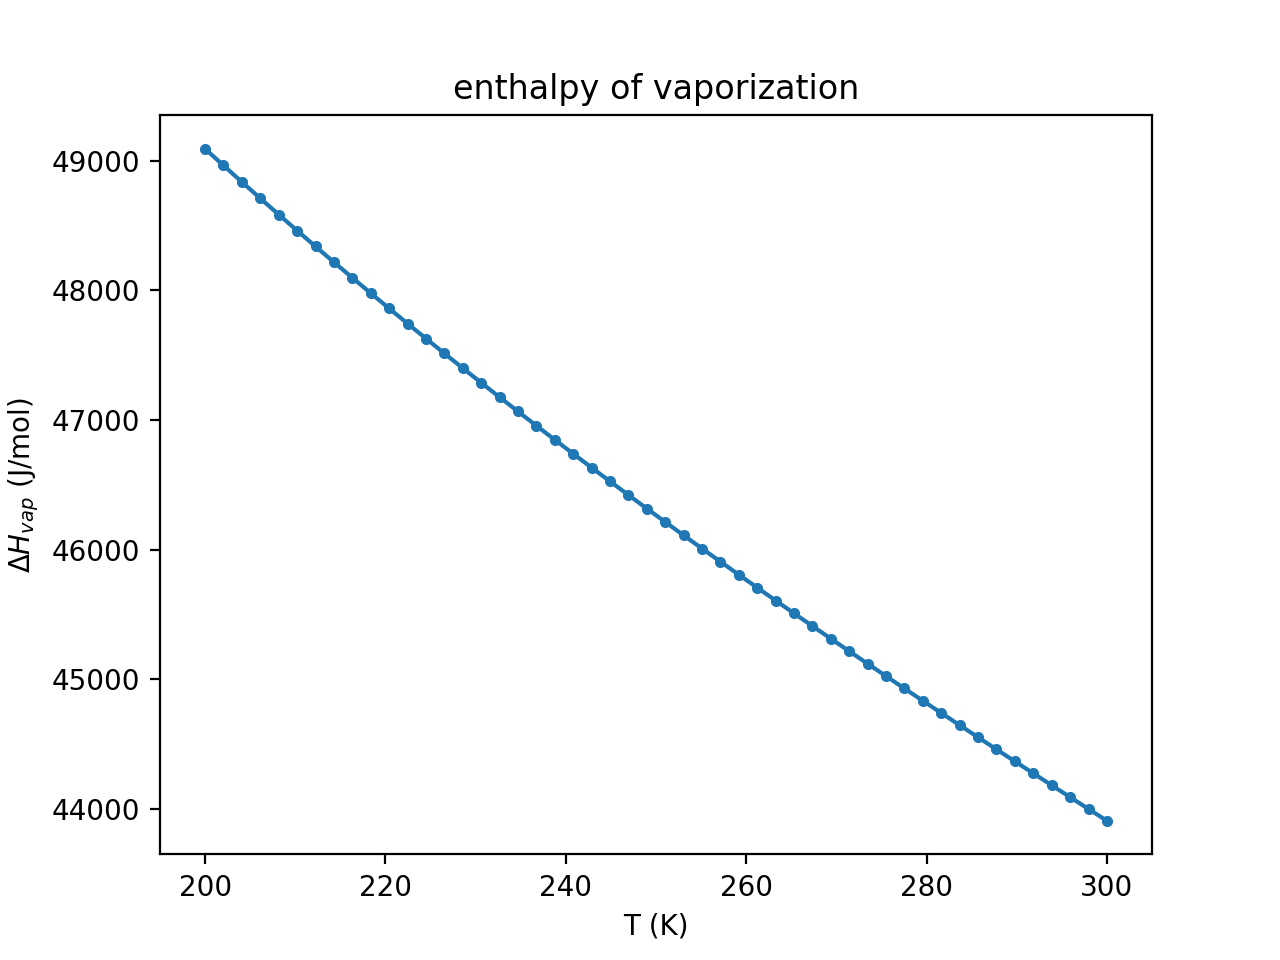

Text(0.5, 1.0, 'enthalpy of vaporization')

In [3]:
Hvap = enthalpy_vap(temp,algorithm=1)

plt.figure()
plt.plot(temp,Hvap,'.-')
plt.xlabel(r'T (K)')
plt.ylabel(r'$\Delta H_{vap}$ (J/mol)')
plt.title('enthalpy of vaporization')

<IPython.core.display.Javascript object>


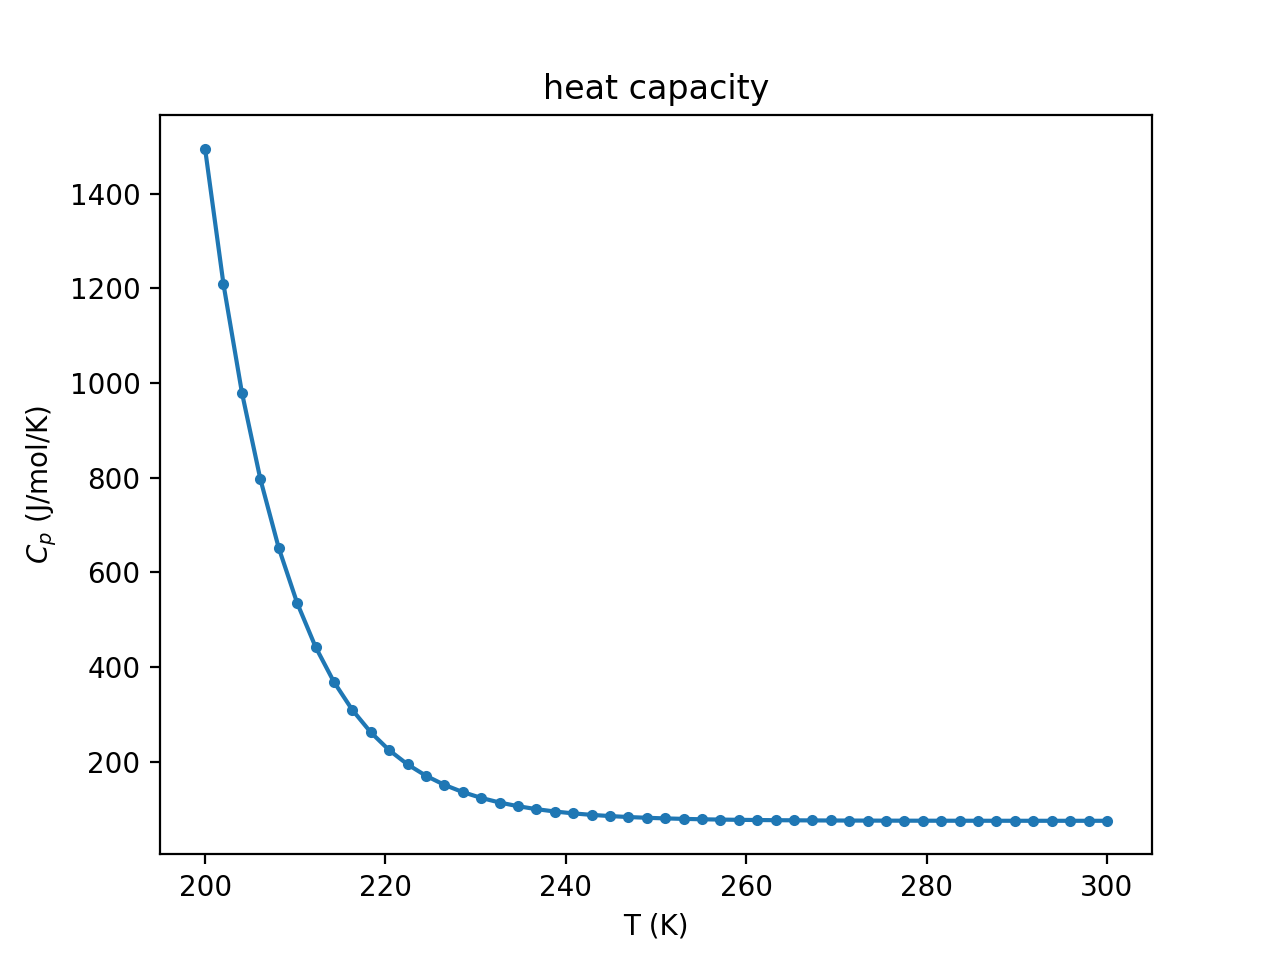

Text(0.5, 1.0, 'heat capacity')

In [5]:
Cp_vals = heat_capacity(temp,algorithm=1)

plt.figure()
plt.plot(temp,Cp_vals,'.-')
plt.xlabel(r'T (K)')
plt.ylabel(r'$C_{p}$ (J/mol/K)')
plt.title('heat capacity')

<IPython.core.display.Javascript object>


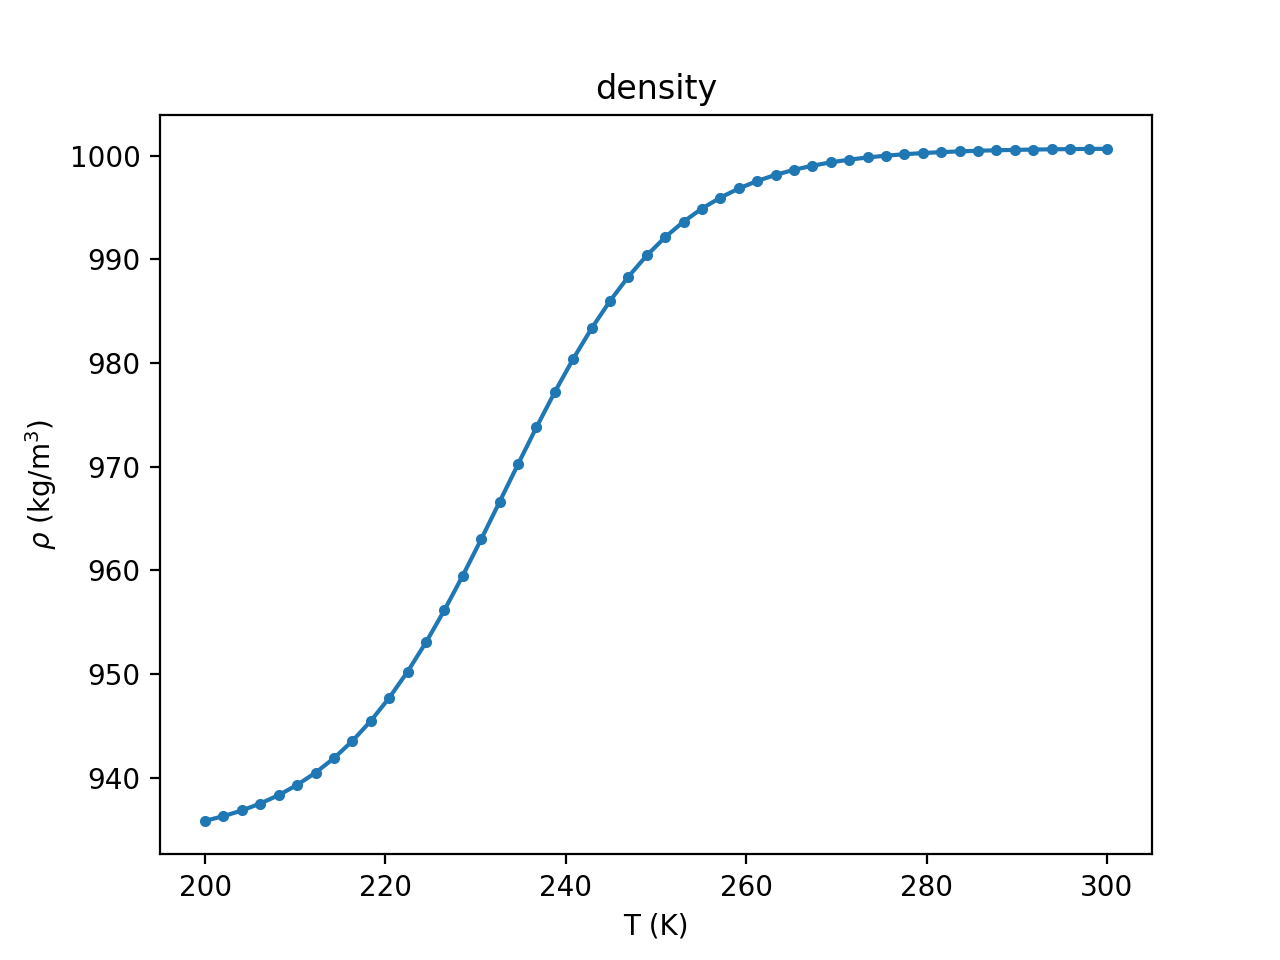

Text(0.5, 1.0, 'density')

In [8]:
rho_vals = density(temp,algorithm=1)

plt.figure()
plt.plot(temp,rho_vals,'.-')
plt.xlabel(r'T (K)')
plt.ylabel(r'$\rho$ (kg/m$^3$)')
plt.title('density')

<IPython.core.display.Javascript object>


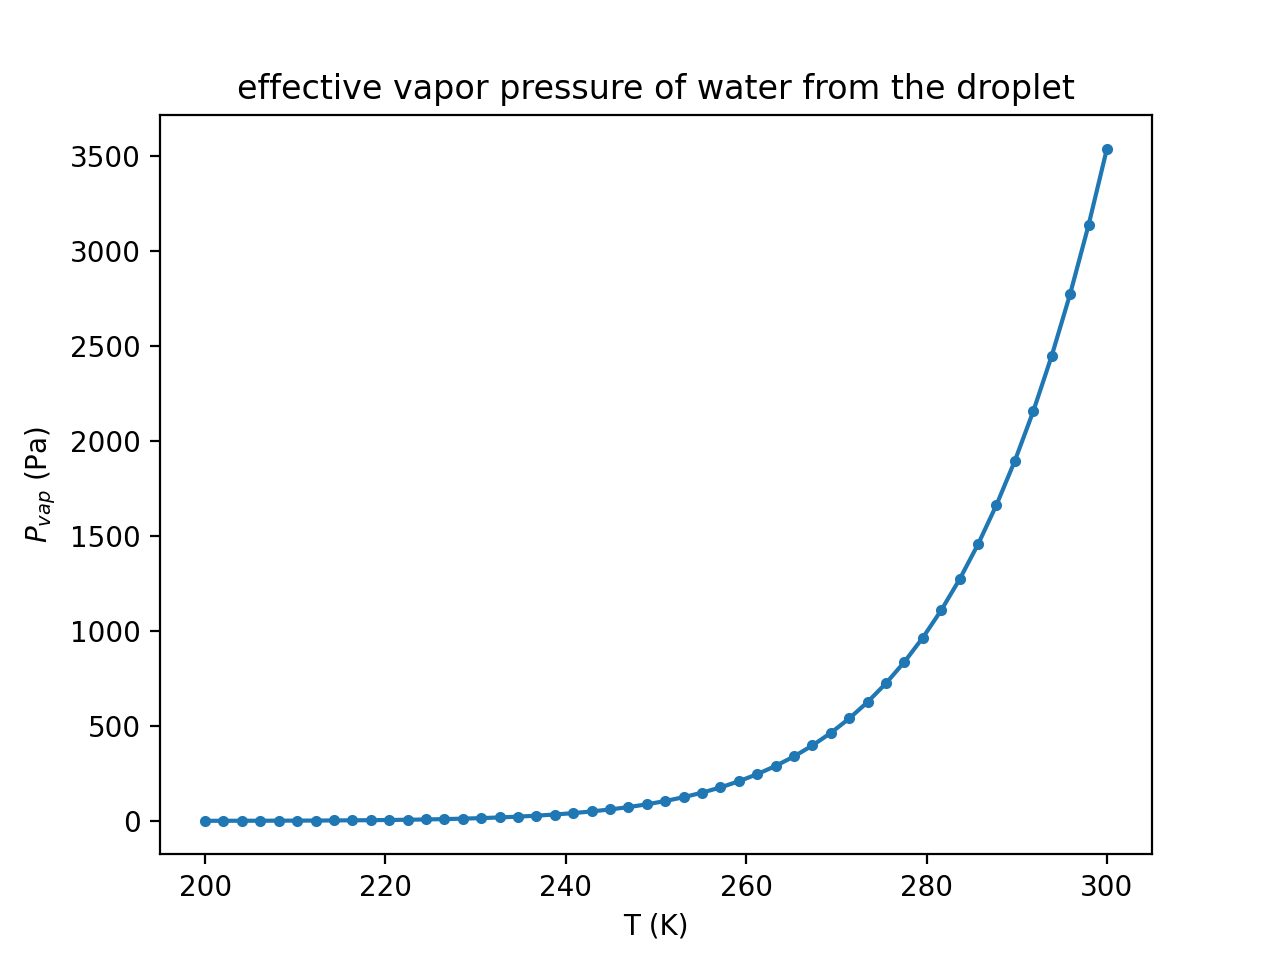

Text(0.5, 1.0, 'effective vapor pressure of water from the droplet')

In [7]:
Pv = Pvap(temp,P0=0,algorithm=1)

plt.figure()
plt.plot(temp,Pv,'.-')
plt.xlabel(r'T (K)')
plt.ylabel(r'$P_{vap}$ (Pa)')
plt.title('effective vapor pressure of water from the droplet')

<IPython.core.display.Javascript object>


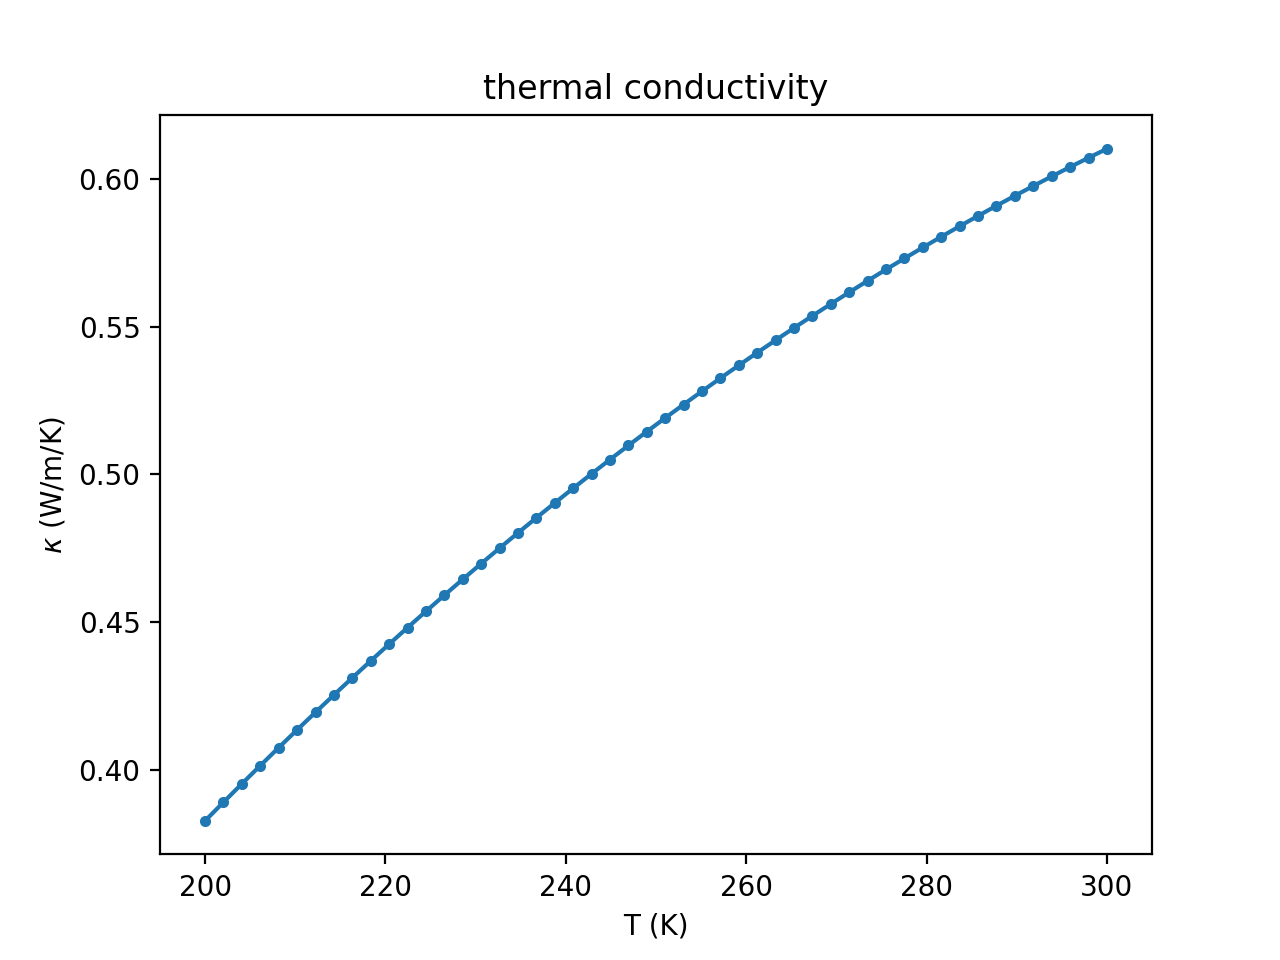

Text(0.5, 1.0, 'thermal conductivity')

In [9]:
kappa = thermal_cond(temp,algorithm=1)

plt.figure()
plt.plot(temp,kappa,'.-')
plt.xlabel(r'T (K)')
plt.ylabel(r'$\kappa$ (W/m/K)')
plt.title('thermal conductivity')

<IPython.core.display.Javascript object>


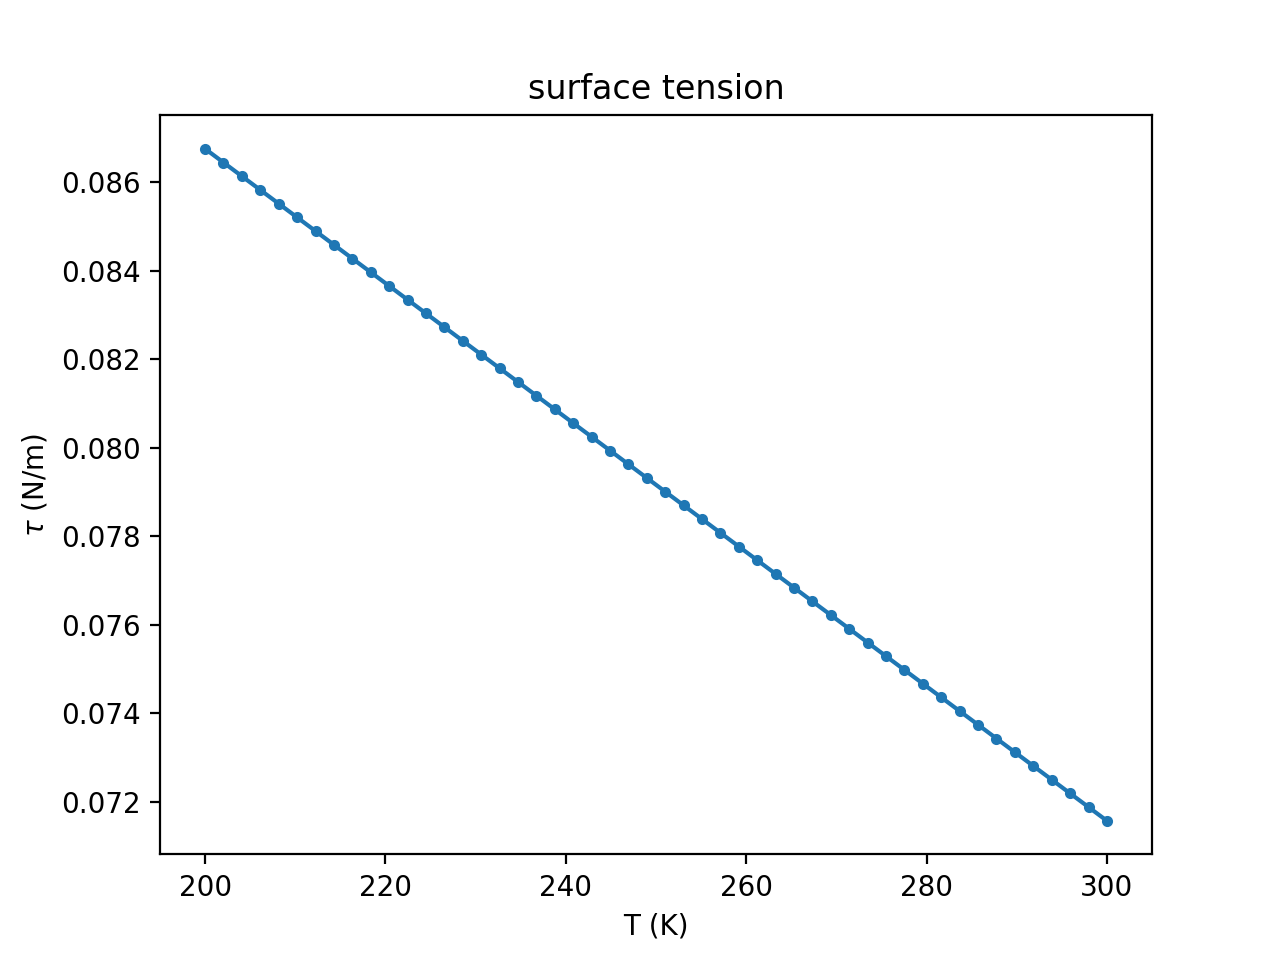

Text(0.5, 1.0, 'surface tension')

In [10]:
Gamma = surf_tension(temp,algorithm=1)

plt.figure()
plt.plot(temp,Gamma,'.-')
plt.xlabel(r'T (K)')
plt.ylabel(r'$\tau$ (N/m)')
plt.title('surface tension')

# Evaporative cooling

## Input parameters:

In [32]:
# input parameters:

test = False
date = '20221021'

r0 = 13e-6/2    # initial droplet radius m
T0=295.0        # initial temperature of the sample K
P0_mbar=3e-2    # chamber pressure mbar

NShell=100      # no shells
dt=1.0e-8       # time step length s
NSteps=1000000  # no of time steps
Nout=10         # no of time steps to save data (save every outfreq = NSteps/Nout)
g=1.0           # gamma factor (use 1 for water)

#output=evapcool-largerdrop_sharon_test.h5 # not implemented in script yet
save_dir = f'/Users/sharonberkowicz/Nextcloud/Research/SACLA_Oct2022/evaporative_cooling/results/%s_%.d_%.d_%.d' %(date,2*r0*1e9,P0_mbar,T0)

if not os.path.exists(save_dir) and not test:
        os.mkdir(save_dir)

# choose experimental parameter algorithms:
DHalgorithm=1
Cpalgorithm=1
rhoalgorithm=1
Pvapalgorithm=1
kappaalgorithm=1
taualgorithm=1

print('total time', (NSteps-1)*dt*1e3, 'ms')
P0=P0_mbar*1e-3*1e5

total time 9.99999 ms


## Run evaporative cooling

In [45]:
import sys
! python EvapCool_fun.py | tee save_dir+'.txt'

Traceback (most recent call last):
  File "EvapCool_fun.py", line 2, in <module>
    from exp_parameters import *
  File "/Users/sharonberkowicz/Nextcloud/Research/SACLA_Oct2022/evaporative_cooling/exp_parameters.py", line 150
SyntaxError: Non-ASCII character '\xe2' in file /Users/sharonberkowicz/Nextcloud/Research/SACLA_Oct2022/evaporative_cooling/exp_parameters.py on line 150, but no encoding declared; see http://python.org/dev/peps/pep-0263/ for details


In [33]:
t, T = EvapCool_run(save_dir, r0, NShell, dt, NSteps, Nout, g, T0, P0, DHalgorithm, Cpalgorithm, rhoalgorithm, Pvapalgorithm, kappaalgorithm, taualgorithm)

#   --------------------------------------------------------------------
#   Droplet radius         r0 = 6.500 um
#   Initial temperature    T0 = 295.000 K
#   Backpressure           P0 = 3.000 Pa
#   Time step              dt = 10.000 ns
#   Number of shells   NShell = 100
#   Number of steps    NSteps = 1000000
#   Evaporation coeff   gamma = 1.0
#   Hvap  -- taken from Somayujulu, Int. J. Thermophysics 9, 567 (1988)
#   Cp    -- taken from Angell, JPC 86, 998 (1982)
#   rho   -- interpolation of experimental density data of ice (Ih = 0.934 g/cm^3) and water taken from Kell, Journal of Chemical Engineering Data 20, 97 (1975)
#   Psat  -- taken from Murphy & Koop, Quarterly Journal of the Royal Meteorological Society 131, 1539 (2005)
#   kappa -- polynomial (T^4) fit to experiment taken from CRC Handbook of Chemistry and Physics, 2nd ed., E-10
#   tau   -- taken from Floriano & Angell, JCP 94, 10 (1990)
#   --------------------------------------------------------------------
#   t [s]

In [46]:
! python EvapCool_fun.py | tee save_dir+'.txt'

Traceback (most recent call last):
  File "EvapCool_fun.py", line 2, in <module>
    from exp_parameters import *
  File "/Users/sharonberkowicz/Nextcloud/Research/SACLA_Oct2022/evaporative_cooling/exp_parameters.py", line 150
SyntaxError: Non-ASCII character '\xe2' in file /Users/sharonberkowicz/Nextcloud/Research/SACLA_Oct2022/evaporative_cooling/exp_parameters.py on line 150, but no encoding declared; see http://python.org/dev/peps/pep-0263/ for details


## Plot results

<IPython.core.display.Javascript object>


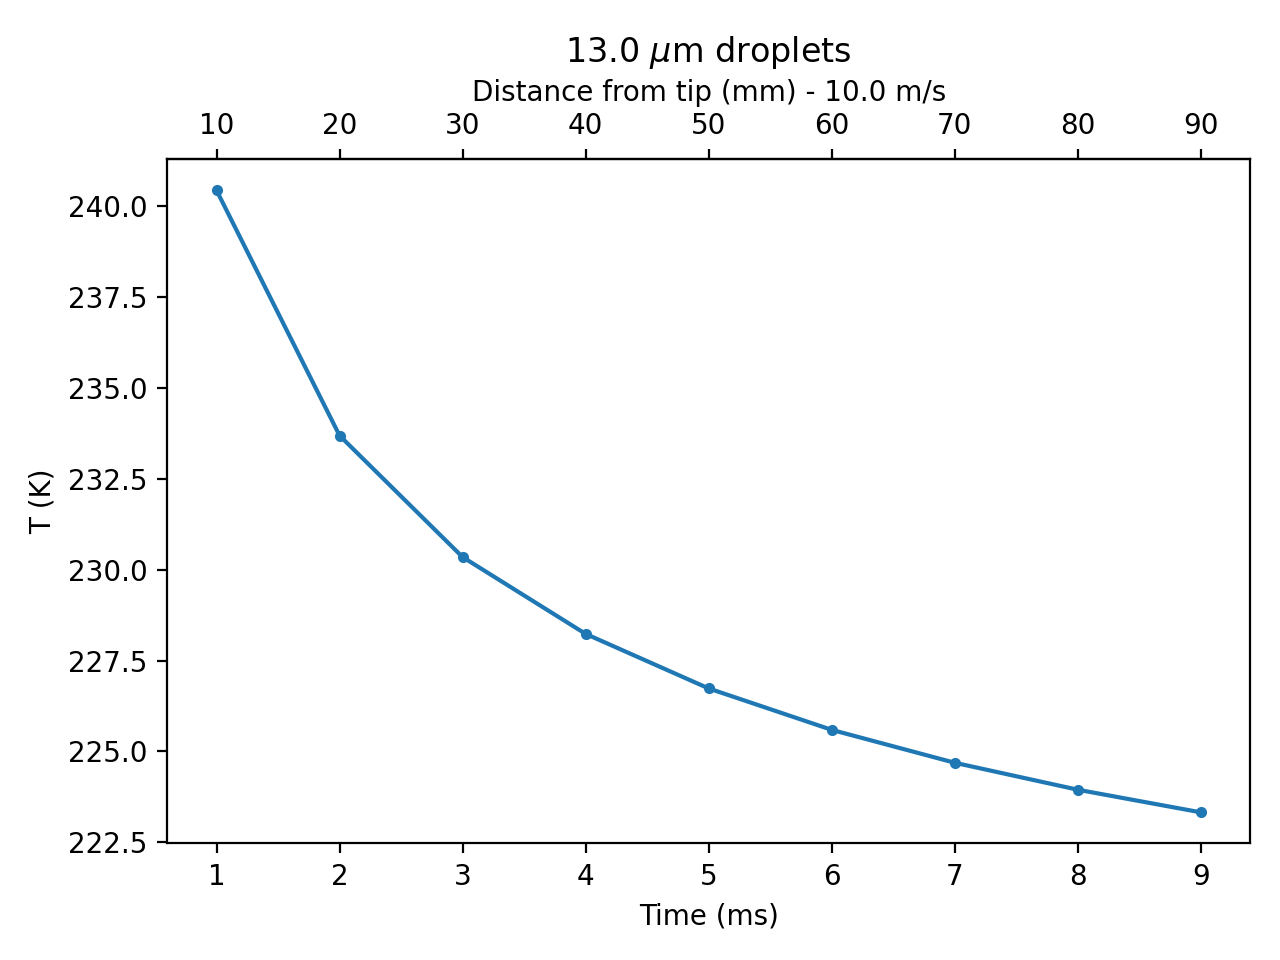

In [76]:
#frequency =               # droplet (piezo) frequency Hz
#l_dd =                    # droplet-droplet distance m
#velocity = frequency*l_dd # droplet velocity m/s
velocity = 10 # droplet velocity m/s

fig, ax1 = plt.subplots()
ax1.plot(t*1e3,T, '.-')
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('T (K)')
ax1.set_title(r'%.1f $\mu$m droplets' %(r0*2*1e6))

forward = lambda x: x*velocity
inverse = lambda x: x/velocity
ax2 = ax1.secondary_xaxis("top", functions=(forward,inverse))
ax2.set_xlabel('Distance from tip (mm) - %.1f m/s' %velocity)

plt.tight_layout()

plt.savefig('fig1')